<a href="https://colab.research.google.com/github/boiBASH/Sterling-Bank-Data-Science-Assessment./blob/main/Model_Building_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [3]:
# Load Dataset
df = pd.read_excel('/content/drive/MyDrive/Sterling Bank Assessment/encoded_model_ready_loan_data.xlsx')
df

,sector,PRODUCT_GROUP_NAME,FACILITY_TYPE,Contract_Amount,CURR_BAL,EQUIV_BALANCE,CONTRACT_MAT_DATE,report_date,PayinAccount_Last_LOD_Date,INTEREST_RATE,...,Default_status,previous_loans_count,previous_loans_amount,running_loans_count,running_loans_amount,previous_loan_default_count,employment_status,age,loan_age_days,customer_tenure_days
0,1,1,3,6.252801e+05,1.217761e+05,1.217761e+05,2020-06-24,2023-05-05,2020-02-07,0,...,1,4,1.165280e+06,0,0.00,1,0,33.0,2591,2101
1,1,1,3,6.252801e+05,1.217761e+05,1.217761e+05,2020-06-24,2023-05-05,2020-02-07,0,...,1,4,1.165280e+06,0,0.00,1,0,33.0,2591,3516
2,1,0,1,1.801259e+04,4.200000e+00,4.200000e+00,2017-08-26,2021-05-31,2019-06-28,0,...,1,2,3.669140e+04,0,0.00,2,4,NaN,3048,3265
3,1,0,1,5.176228e+06,1.975372e+06,1.975372e+06,2018-02-28,2021-05-31,2017-07-19,0,...,1,1,5.176228e+06,0,0.00,1,4,NaN,3042,3327
4,1,0,1,5.176228e+06,1.975372e+06,1.975372e+06,2018-02-28,2021-05-31,2017-07-19,0,...,1,1,5.176228e+06,0,0.00,1,4,NaN,3042,3043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,3,0,1,2.452215e+06,2.452215e+06,2.452215e+06,2023-06-01,2023-06-27,2023-06-02,52,...,1,1,2.452215e+06,1,2786392.55,1,0,51.0,1349,1447
1576,3,0,1,2.786393e+06,2.786393e+06,2.786393e+06,2023-09-28,2023-08-23,2023-06-30,52,...,0,1,2.452215e+06,1,2786392.55,1,0,51.0,764,4096
1577,3,0,1,2.786393e+06,2.786393e+06,2.786393e+06,2023-09-28,2023-08-23,2023-06-30,52,...,0,1,2.452215e+06,1,2786392.55,1,0,51.0,764,1447
1578,1,2,2,1.000000e+07,9.745611e+06,9.745611e+06,2023-07-28,2023-08-23,2023-08-21,44,...,1,1,1.000000e+07,0,0.00,1,0,49.0,3372,3372


In [4]:
# Drop raw datetime columns before modeling
datetime_cols = ['CONTRACT_MAT_DATE', 'report_date', 'PayinAccount_Last_LOD_Date']
X = df.drop(columns=['Default_status'] + datetime_cols)
y = df['Default_status']

# Define and apply imputer
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.25, random_state=42, stratify=y
)

# Train Logistic Regression with class_weight
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# Train Random Forest with class_weight
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Evaluate Logistic Regression
lr_report = classification_report(y_test, lr_preds, output_dict=True)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
lr_cm = confusion_matrix(y_test, lr_preds)

# Evaluate Random Forest
rf_report = classification_report(y_test, rf_preds, output_dict=True)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
rf_cm = confusion_matrix(y_test, rf_preds)


In [5]:
# Output results
print("Logistic Regression Report:")
print(lr_report)
print("AUC:", lr_auc)
print("Confusion Matrix:\n", lr_cm)

print("\nRandom Forest Report:")
print(rf_report)
print("AUC:", rf_auc)
print("Confusion Matrix:\n", rf_cm)

Logistic Regression Report:
{'0': {'precision': 0.8536585365853658, 'recall': 0.6756756756756757, 'f1-score': 0.7543103448275862, 'support': 259.0}, '1': {'precision': 0.5578947368421052, 'recall': 0.7794117647058824, 'f1-score': 0.6503067484662577, 'support': 136.0}, 'accuracy': 0.7113924050632912, 'macro avg': {'precision': 0.7057766367137355, 'recall': 0.7275437201907791, 'f1-score': 0.7023085466469219, 'support': 395.0}, 'weighted avg': {'precision': 0.7518259371800913, 'recall': 0.7113924050632912, 'f1-score': 0.718501511650015, 'support': 395.0}}
AUC: 0.7800647285941403
Confusion Matrix:
 [[175  84]
 [ 30 106]]

Random Forest Report:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 259.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 136.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 395.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 395.0}}
AUC: 1.0
Confus

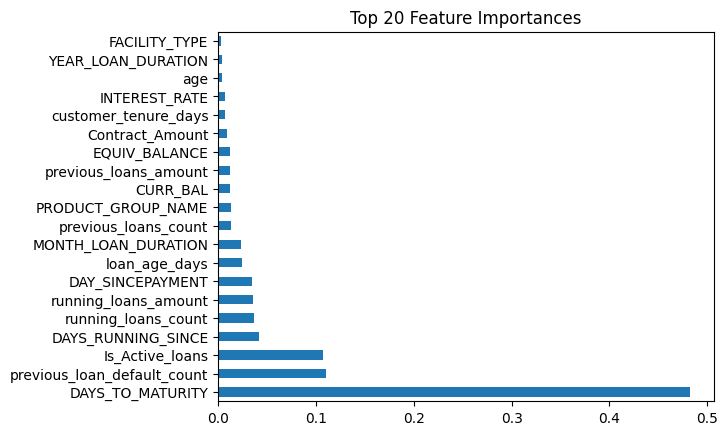

In [6]:
import matplotlib.pyplot as plt
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Top 20 Feature Importances")
plt.show()


In [7]:
df[['DAYS_TO_MATURITY', 'Default_status']].corr()


,DAYS_TO_MATURITY,Default_status
DAYS_TO_MATURITY,1.000000,-0.413216
Default_status,-0.413216,1.000000


This is a strong negative correlation, meaning the closer a loan is to maturity (i.e., fewer days left), the more likely it is to be marked as default. That’s super sus.

In [8]:
leak_cols = ['CONTRACT_MAT_DATE', 'report_date', 'PayinAccount_Last_LOD_Date', 'DAYS_TO_MATURITY']
X = df.drop(columns=['Default_status'] + leak_cols)
y = df['Default_status']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)


In [9]:
pipeline = ImbPipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),  # optional, can skip for trees
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
])


In [10]:
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5],
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', StandardScaler()),
                                       ('smote', SMOTE(random_state=42)),
                                       ('clf',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [None, 10, 20],
                         'clf__min_samples_split': [2, 5],
                         'clf__n_estimators': [100, 200]},
             scoring='f1_macro', verbose=2)

In [11]:
best_model = grid.best_estimator_
y_preds = best_model.predict(X_test)

print("Best Params:", grid.best_params_)
print("ROC AUC:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_preds))
print("Classification Report:\n", classification_report(y_test, y_preds))


Best Params: {'clf__max_depth': None, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
ROC AUC: 0.9962951396774926
Confusion Matrix:
 [[250   9]
 [  2 134]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       259
           1       0.94      0.99      0.96       136

    accuracy                           0.97       395
   macro avg       0.96      0.98      0.97       395
weighted avg       0.97      0.97      0.97       395

